<a href="https://colab.research.google.com/github/Hibi1001/practice/blob/main/section_3/01_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徴量エンジニアリング
データの特徴を捉え、使いやすいように加工します。  

## データの読み込み
タイタニック号の乗客データを読み込みます。  
以下のページからタイタニック号の乗客データをダウロードして、「train.csv」「test.csv」をノートブック環境にアップします。  
https://www.kaggle.com/c/titanic/data

訓練データには乗客が生き残ったどうかを表す"Survived"の列がありますが、テストデータにはありません。   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train-2.csv")  # 訓練データ
test_data = pd.read_csv("test-2.csv") # テストデータ

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## 兄弟、配偶者の数
SibSp（兄弟/配偶者の数）の分布をグラフで確認します。

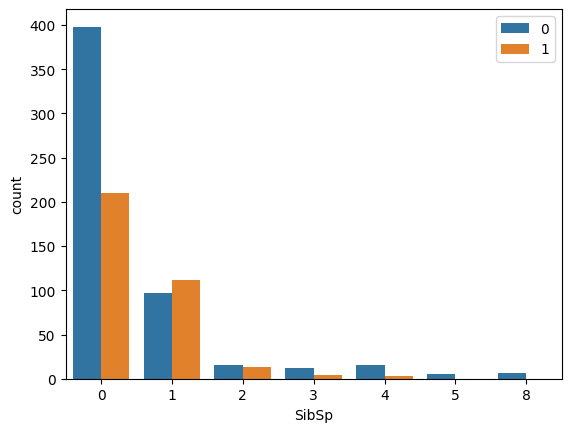

In [3]:
#seabornライブラリを用いて、カウントプロットを行う
sns.countplot(x="SibSp", hue="Survived", data=train_data)
#hueの記述によりSurvivedのフィルターを作成し、色分けが可能。

plt.legend()#凡例の表示
plt.show()#グラフのプロット

## 両親、子供の数
Parch（親/子供の数）の分布をグラフで確認します。

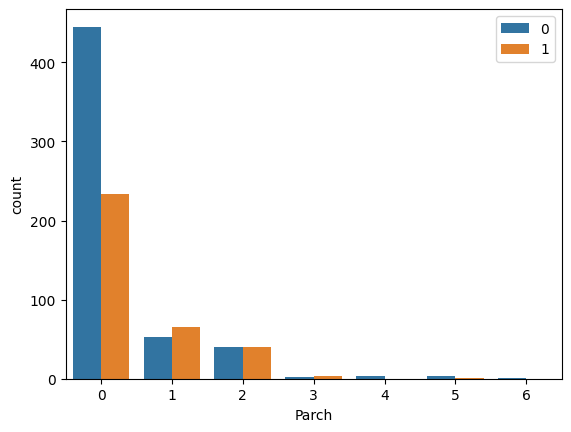

In [12]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.legend()
plt.show()

## チケットのクラス
Pclass（チケットのクラス）の分布をグラフで確認します。

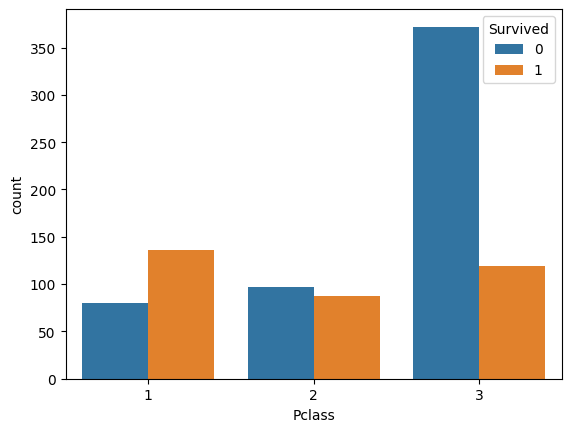

In [16]:
sns.countplot(x="Pclass", hue="Survived", data=train_data)
#plt.legend()
plt.show()

## 性別
Sex（性別）の分布をグラフで確認します。

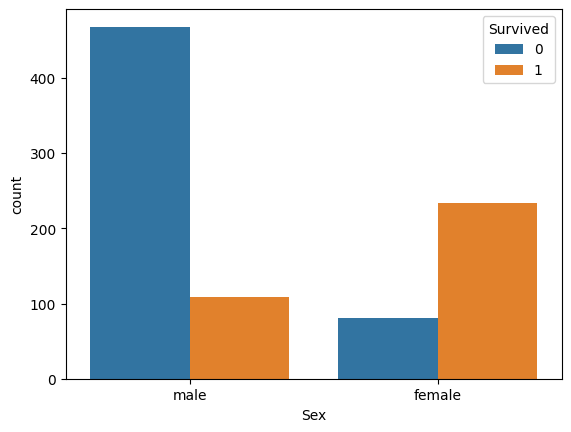

In [17]:
sns.countplot(x="Sex", hue="Survived", data=train_data)
plt.show()

## 出港地
Embarked（出港地）の分布をグラフで確認します。

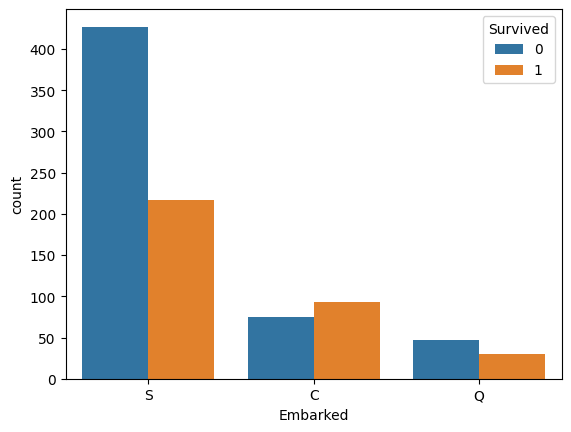

In [18]:
sns.countplot(x="Embarked", hue="Survived", data=train_data)
plt.show()

## 年齢の分布
Age（年齢）の分布をグラフで確認します。  

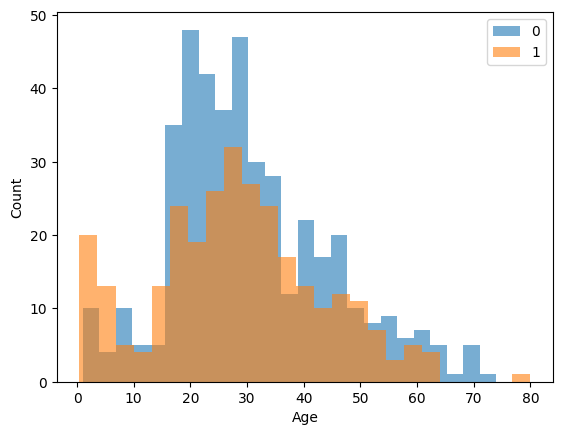

In [29]:
bins = 25  # 棒の数
alpha = 0.6  # 棒の透明度

# 棒グラフの描画
plt.hist(train_data.loc[train_data["Survived"]==0, "Age"].dropna(), bins=bins, alpha=alpha, label="0")  # 死亡
plt.hist(train_data.loc[train_data["Survived"]==1, "Age"].dropna(), bins=bins, alpha=alpha, label="1")  # 生存
#Survivedが0か1でフィルターをかけ、それぞれの場合のAge(drop.na()で欠損値は除去してるね！)の分布を描画している。

# 軸ラベル
plt.xlabel("Age")
plt.ylabel("Count")

plt.legend()
plt.show()

## 料金の分布
Fare（料金）の分布をグラフで確認します。  

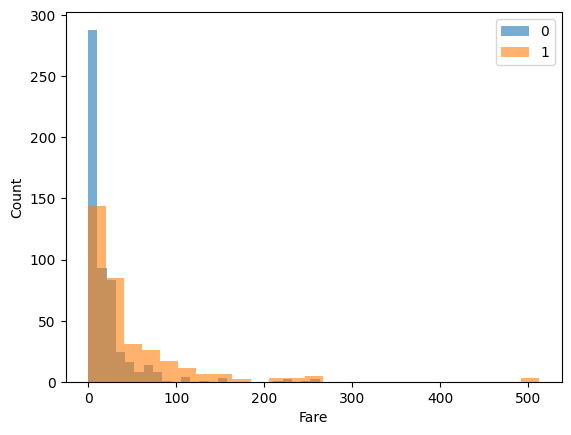

In [30]:
bins = 25  # 棒の数
alpha = 0.6  # 棒の透明度

plt.hist(train_data.loc[train_data["Survived"] == 0, "Fare"].dropna(), bins=bins, alpha=alpha, label="0")  # 死亡
plt.hist(train_data.loc[train_data["Survived"] == 1, "Fare"].dropna(), bins=bins, alpha=alpha, label="1")  # 生存

# 軸ラベル
plt.xlabel("Fare")
plt.ylabel("Count")

plt.legend()
plt.show()

## 特徴量エンジニアリング
データを機械学習に使える形に変換し、新しい特徴量を作成します。  
まずはデータを機械学習に適した形に変換しますが、`inplace`を`True`にすることで、元のデータが変更されるようになります。

In [31]:
data = pd.concat([train_data, test_data], sort=False)  # テストデータ、訓練データを結合

# 性別を0か1の値に変換
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)

# 出港地の欠損値を埋め、0、1、2の値に変換
data["Embarked"].fillna(("S"), inplace=True)
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
#data["Embarked"].replace(["S", "C", "Q"], [0, 1, 2])
# 欠損値を埋める
data["Fare"].fillna(data["Fare"].mean(), inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

<ipython-input-31-2bd5d0ef40ab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
<ipython-input-31-2bd5d0ef40ab>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
<ipython-input

SibSpとParchを合わせて、新しい特徴量「Family」を作ります。

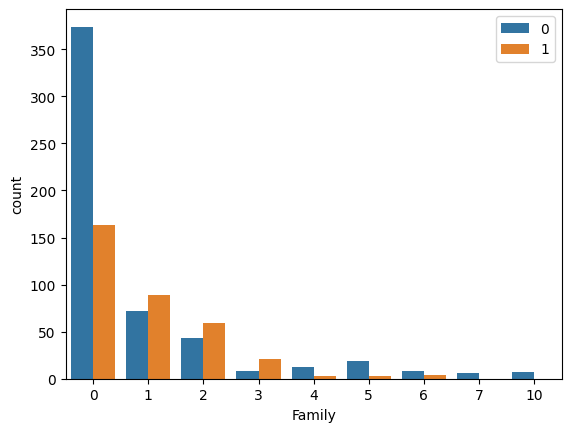

In [32]:
data["Family"] = data["Parch"] + data["SibSp"]

train_data["Family"] = data["Family"][:len(train_data)]#始点からtrain_dataの終わりまで
test_data["Family"] = data["Family"][len(train_data):]#train_dataの最後の行の「次の」行からラストまで

sns.countplot(x="Family", data=train_data, hue="Survived")
plt.legend()
plt.show()

不要な特徴量を削除し、機械学習モデルへの入力を作成します。

In [33]:
# 不要な特徴量の削除
data.drop(["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"],
          axis=1, inplace=True)

train_data = data[:len(train_data)]
test_data = data[len(train_data):]

t = train_data["Survived"]  # 正解
x_train = train_data.drop("Survived", axis=1)  # 訓練時の入力
x_test = test_data.drop("Survived", axis=1)  # テスト時の入力

x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0
